In [257]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

plt.rc('figure', figsize=(10, 6))

In [258]:
df = pd.read_csv('data/heart_disease_uci.csv')
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


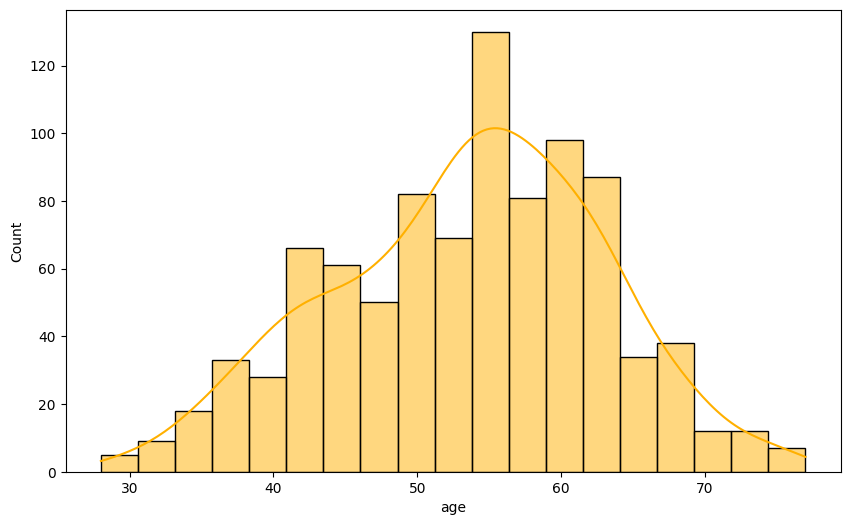

In [259]:
sns.histplot(df['age'], kde=True, color="#ffb000")
plt.show()

The age column distribution seems to be normaly distributed because we can clearly see the bill curve.

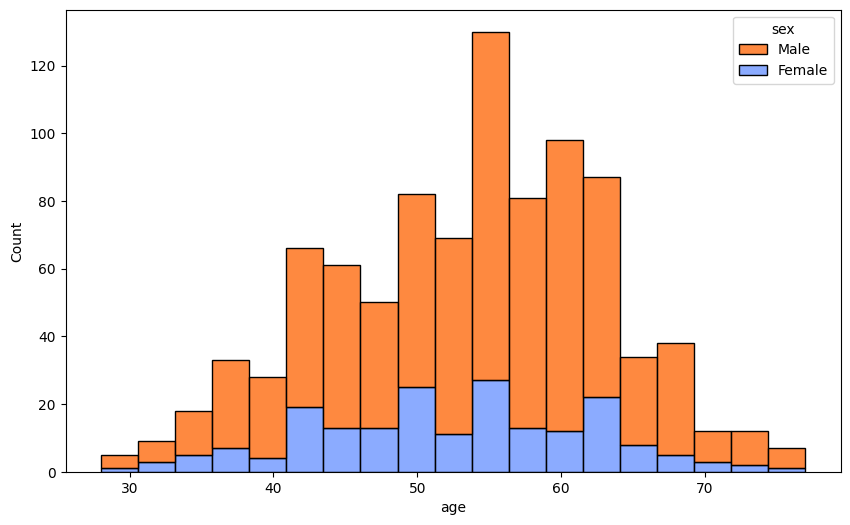

In [260]:
t_cls = ['#fe6100', '#648fff']

sns.histplot(data=df, x='age', hue='sex', multiple='stack', palette=t_cls)
plt.show()

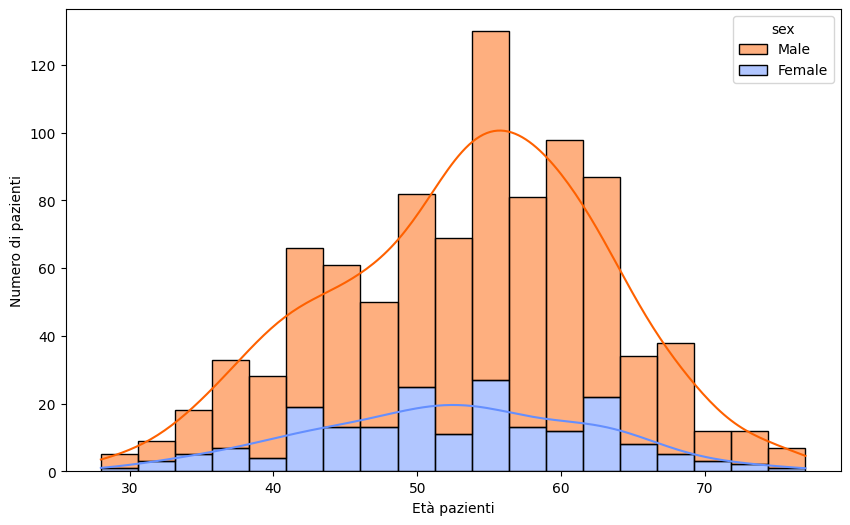

In [261]:
# Draw a histogram to check the distribution of age column

histplot = sns.histplot(data=df, x='age', hue='sex', multiple='stack', palette=t_cls, kde=True)

# Impostiamo le etichette degli assi
histplot.set_xlabel("Età pazienti")
histplot.set_ylabel("Numero di pazienti")

# Impostiamo il titolo del grafico
# histplot.set_title('Istogramma per il numero di pazienti suddivisi in età')

# Mostriamo il grafico
plt.show()

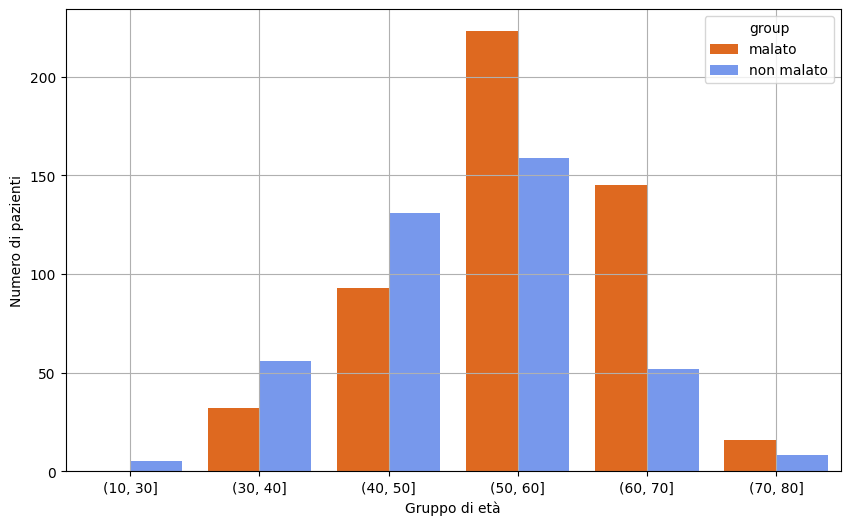

In [262]:
df['group'] = df['num'].apply(lambda x: 'non malato' if x == 0 else 'malato')

age_bins = [10, 30, 40, 50, 60, 70, 80, ]
df['age_group'] = pd.cut(df['age'], bins=age_bins)

# Contiamo il numero di malati e non malati in ciascun intervallo di età
age_group_counts = pd.crosstab(df['age_group'], df['group'])

# Resettiamo l'indice per facilitare la creazione del grafico
age_group_counts = age_group_counts.reset_index()

# Creiamo il grafico a barre
age_group_counts_melted = age_group_counts.melt(id_vars='age_group', value_vars=['malato', 'non malato'],
                                                var_name='group', value_name='count')

plt.figure(figsize=(10, 6))
barplot = sns.barplot(data=age_group_counts_melted, x='age_group', y='count', hue='group',
                      palette=t_cls)

# Impostiamo le etichette degli assi
barplot.set_xlabel("Gruppo di età")
barplot.set_ylabel("Numero di pazienti")

plt.grid(True)
# Impostiamo il titolo del grafico
# barplot.set_title('Numero di malati e non malati per gruppo di età')

# Mostriamo il grafico
plt.show()

Lets explore the gender base distribution of the dataset for age column

In [263]:
df.sex.value_counts()

sex
Male      726
Female    194
Name: count, dtype: int64

In [264]:
male_count = 726
female_count = 194

total_count = male_count + female_count

male_percentage = (male_count/total_count)*100
female_percentages = (female_count/total_count)*100

print(f'Male percentage in the data: {male_percentage:.2f}%')
print(f'Female percentage in the data : {female_percentages:.2f}%')

Male percentage in the data: 78.91%
Female percentage in the data : 21.09%


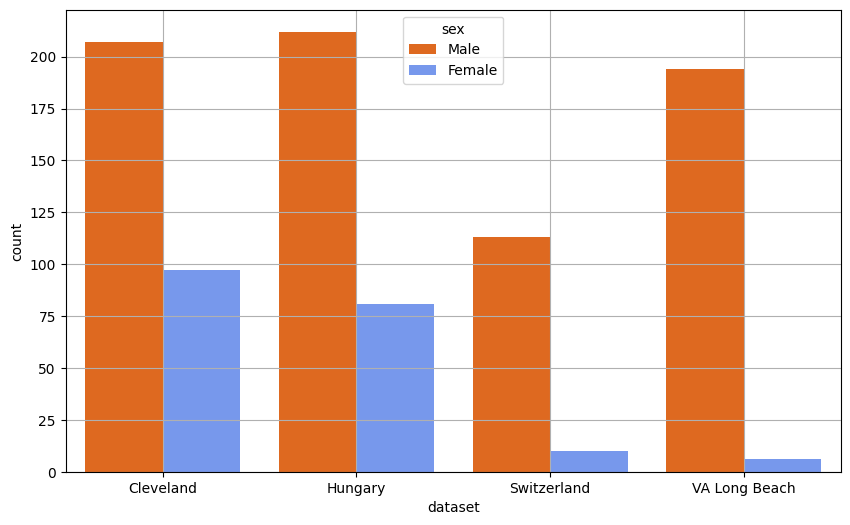

In [265]:
sns.countplot(data=df, x='dataset', hue='sex', palette=t_cls)
plt.grid(True)
plt.show()

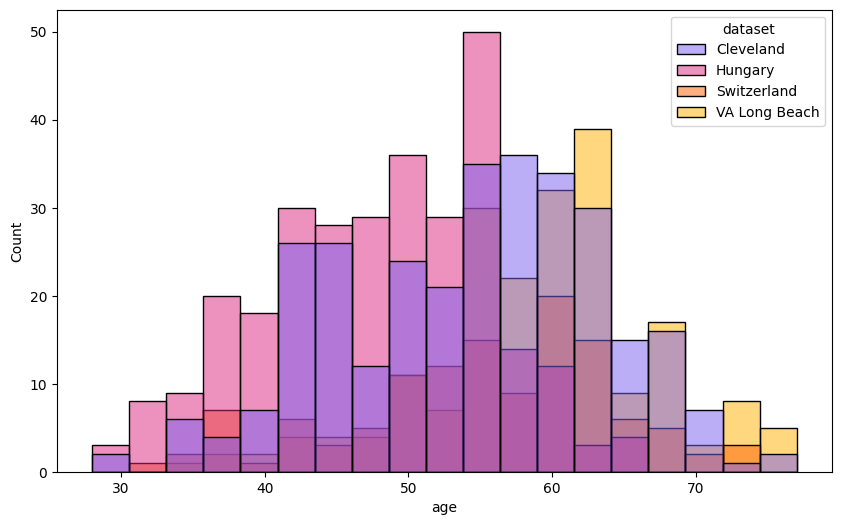

In [266]:
f_cls = ['#785ef0', '#dc267f', '#fe6100', '#ffb000']

ax = sns.histplot(data=df, x='age', hue='dataset', palette=f_cls)

plt.show()

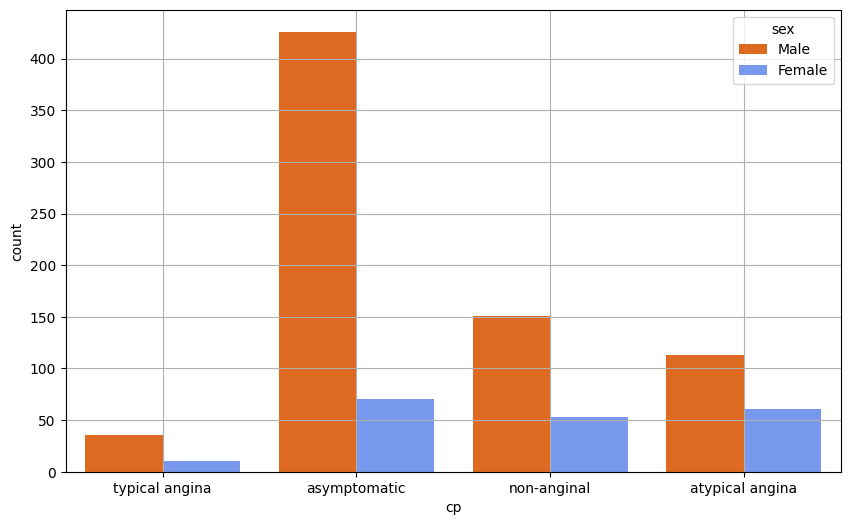

In [267]:
sns.countplot(df, x='cp', hue= 'sex', palette=t_cls)
plt.grid(True)
plt.show()

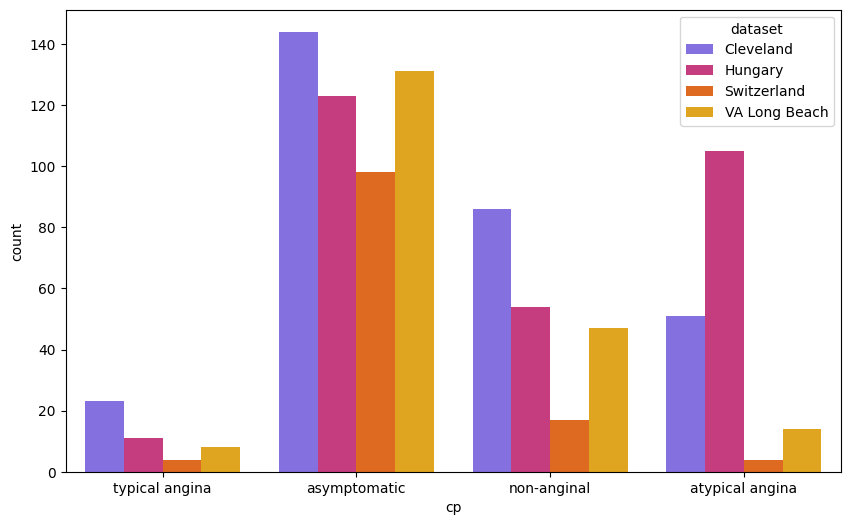

In [268]:
sns.countplot(df,x='cp',hue='dataset', palette=f_cls)
plt.show()

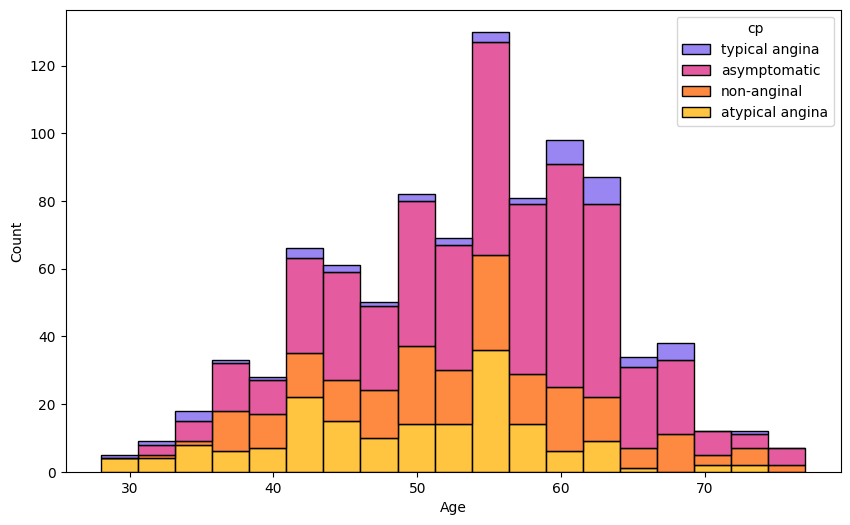

In [269]:
sns.histplot(data=df, x='age', hue='cp', multiple='stack', palette=f_cls)

plt.xlabel('Age')
plt.ylabel('Count')
#plt.title('Histogram by CP')
plt.show()

In [270]:
print(f"Percentage of missing values in trestbps column: {df['trestbps'].isnull().sum() /len(df) *100:.2f}%")

Percentage of missing values in trestbps column: 6.41%


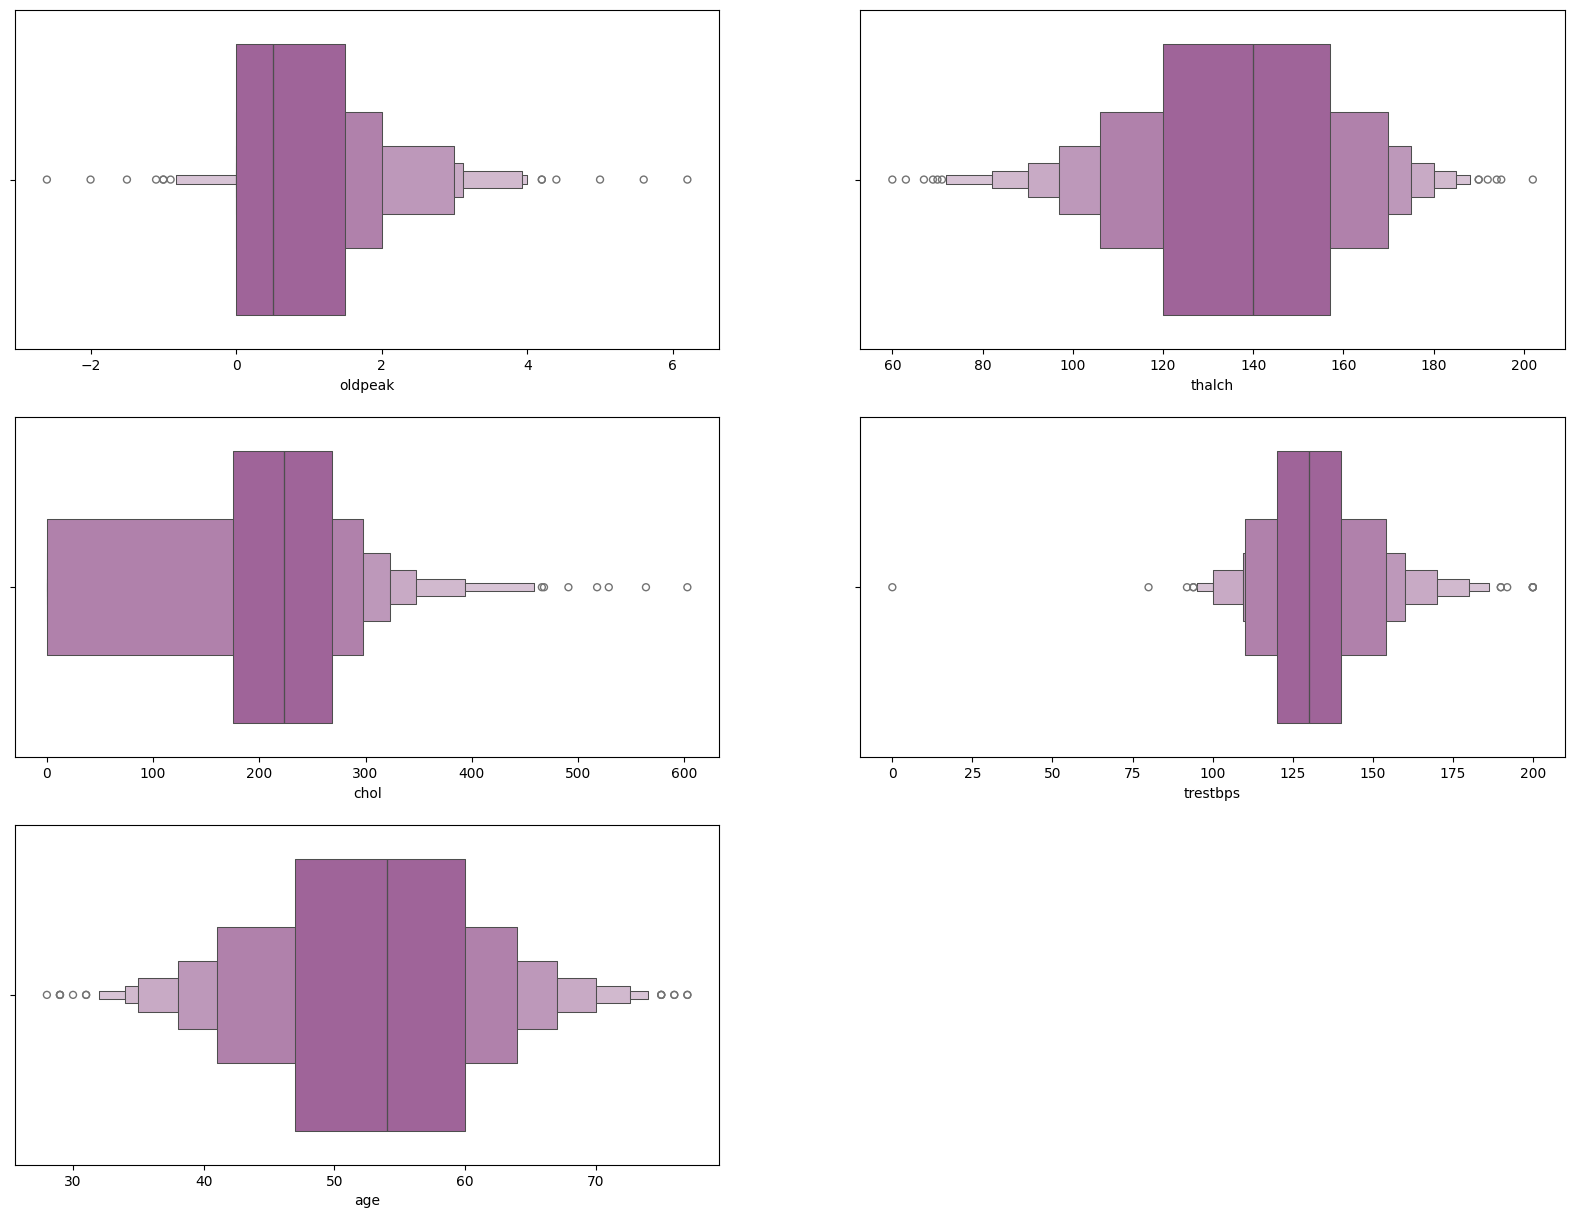

In [271]:
numerical_cols = ['oldpeak', 'thalch', 'chol', 'trestbps', 'age']

plt.figure(figsize=(20,15))

for i, col in enumerate(numerical_cols):
    plt.subplot(3,2, i+1)
    sns.boxenplot(x=df[col], color='#A95AA1') 
    
plt.show()

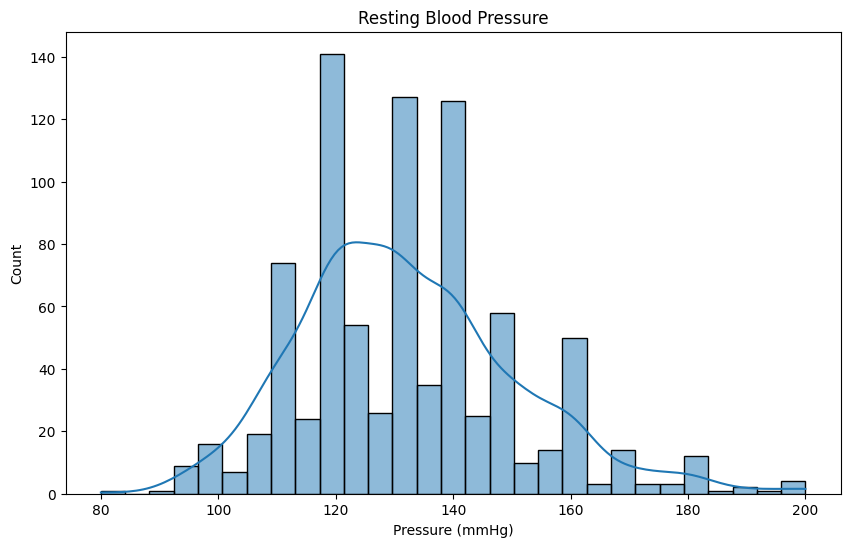

In [272]:
sns.histplot(data=df[df['trestbps'] > 50], x='trestbps', kde=True)
plt.title('Resting Blood Pressure')
plt.xlabel('Pressure (mmHg)')
plt.ylabel('Count')
plt.show()

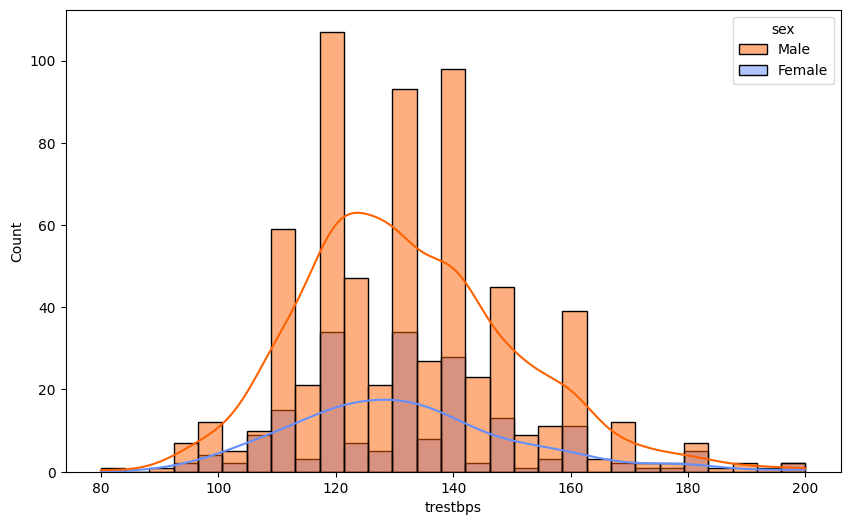

In [273]:
sns.histplot(df[df['trestbps'] > 50], x='trestbps', kde=True, hue ='sex', palette=t_cls) 
plt.show()

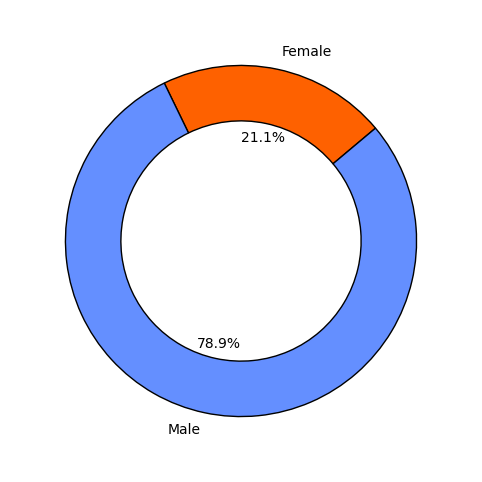

In [274]:
sex_count = df.groupby('sex').size()

# Crea il grafico a torta
fig, ax = plt.subplots(figsize=(8, 6))
wedges, texts, autotexts = ax.pie(sex_count.values, labels=sex_count.index, autopct='%1.1f%%', startangle=40, colors=t_cls,
                                  wedgeprops=dict(width=0.3, edgecolor='black'), radius=0.95)

# Personalizza il grafico
plt.setp(autotexts, size=10)

# Mostra il grafico
plt.show()

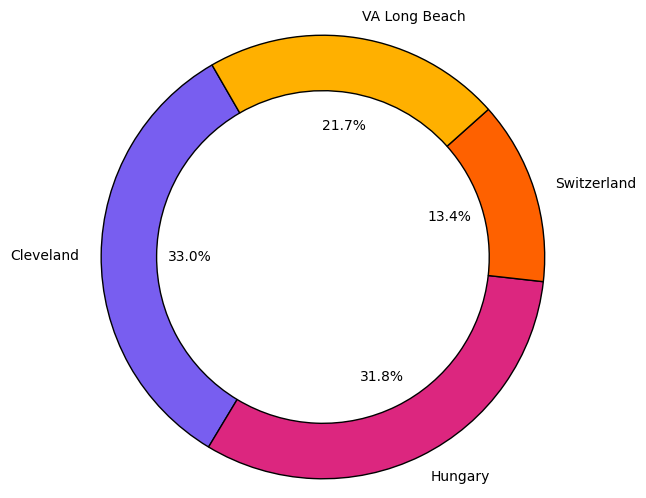

In [275]:
origin_count = df.groupby('dataset').size()

# Crea il grafico a torta
fig, ax = plt.subplots(figsize=(8, 6))
wedges, texts, autotexts = ax.pie(origin_count.values, labels=origin_count.index, autopct='%1.1f%%', startangle=120, colors=f_cls,
                                  wedgeprops=dict(width=0.3, edgecolor='black'), radius=1.2)

# Personalizza il grafico
plt.setp(autotexts, size=10)

# Mostra il grafico
plt.show()

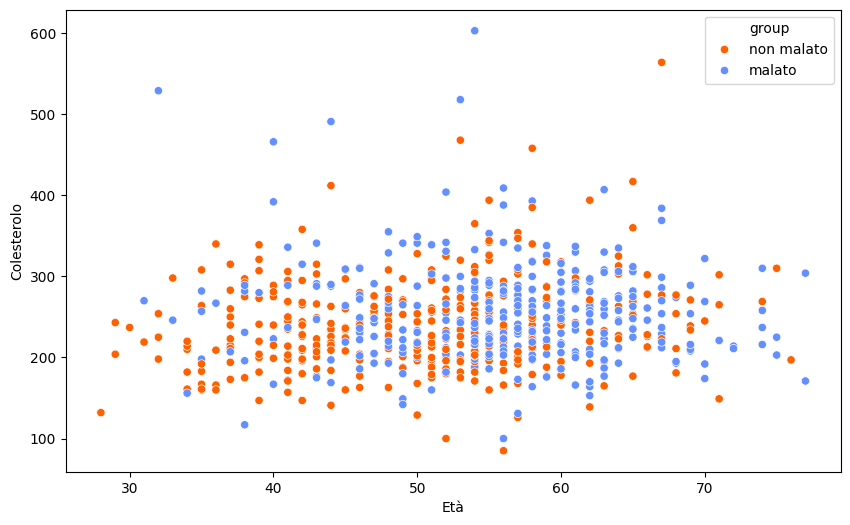

In [285]:
df_senza = df[df['chol'] != 0]
sns.scatterplot(x='age', y='chol', hue='group', data=df_senza, palette=t_cls)
#plt.title('Relazione tra età e colesterolo')
plt.xlabel('Età')
plt.ylabel('Colesterolo')

plt.show()

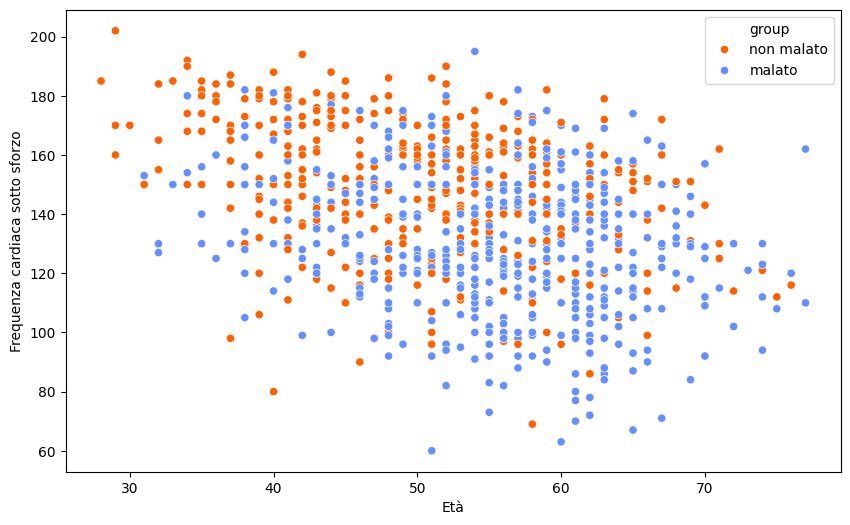

In [281]:
df_senza = df[df['thalch'] != 0]
sns.scatterplot(x='age', y='thalch', hue='group', data=df_senza, palette=t_cls)
#plt.title('Relazione tra età e Frequenza cardiaca sotto sforzo')
plt.xlabel('Età')
plt.ylabel('Frequenza cardiaca sotto sforzo')
plt.show()

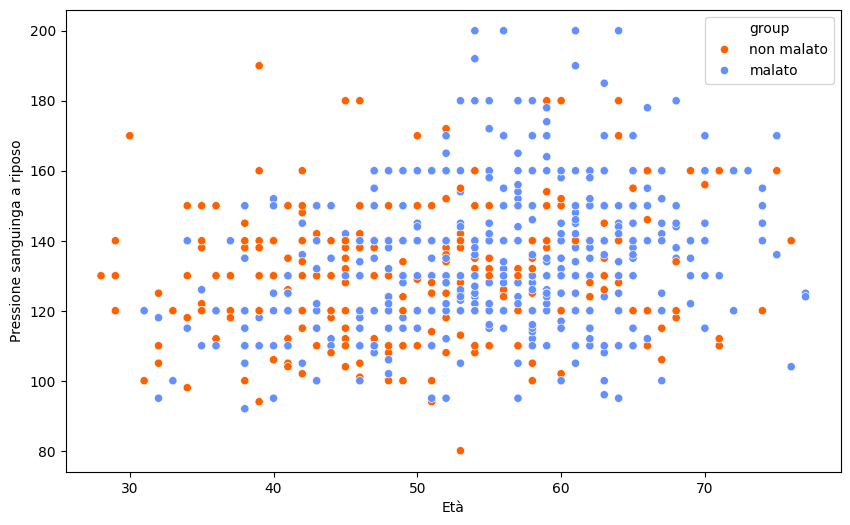

In [282]:
df_senza = df[df['trestbps'] != 0]
sns.scatterplot(x='age', y='trestbps', hue='group', data=df_senza, palette=t_cls)
#plt.title('Relazione tra età e Pressione sanguinga a riposo')
plt.xlabel('Età')
plt.ylabel('Pressione sanguinga a riposo')
plt.show()

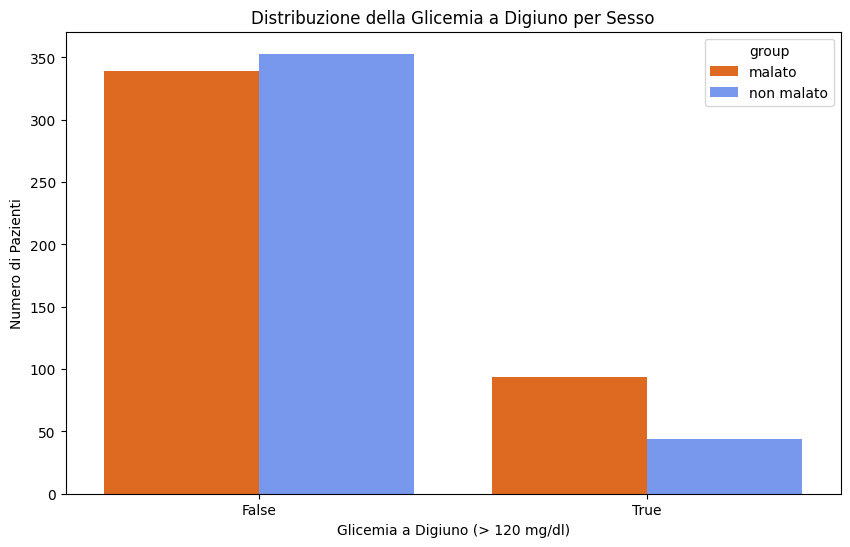

In [286]:

# Controlliamo la distribuzione della glicemia a digiuno (fbs)
plt.figure(figsize=(10, 6))
bar_plot = sns.countplot(x='fbs', hue='group', data=df, palette=t_cls)

# Impostiamo le etichette degli assi
bar_plot.set_xlabel("Glicemia a Digiuno (> 120 mg/dl)")
bar_plot.set_ylabel("Numero di Pazienti")

# Impostiamo il titolo del grafico
bar_plot.set_title("Distribuzione della Glicemia a Digiuno per Sesso")

# Mostriamo il grafico
plt.show()

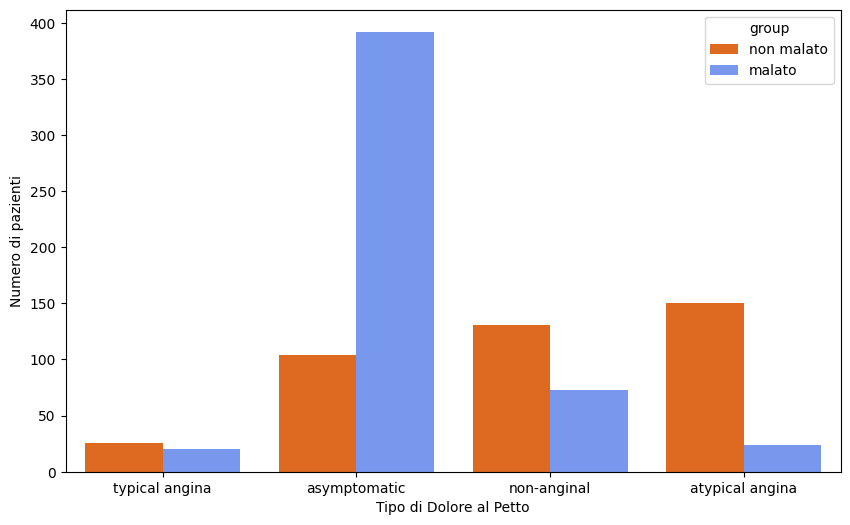

In [292]:
# Grafico a barre per il tipo di dolore al petto
sns.countplot(x='cp', hue='group', data=df, palette=t_cls)
#plt.title('Frequenza dei tipi di dolore al petto')
plt.xlabel('Tipo di Dolore al Petto')
plt.ylabel('Numero di pazienti')
plt.show()

C:\Users\Utente\AppData\Local\Temp\ipykernel_23900\1680113552.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




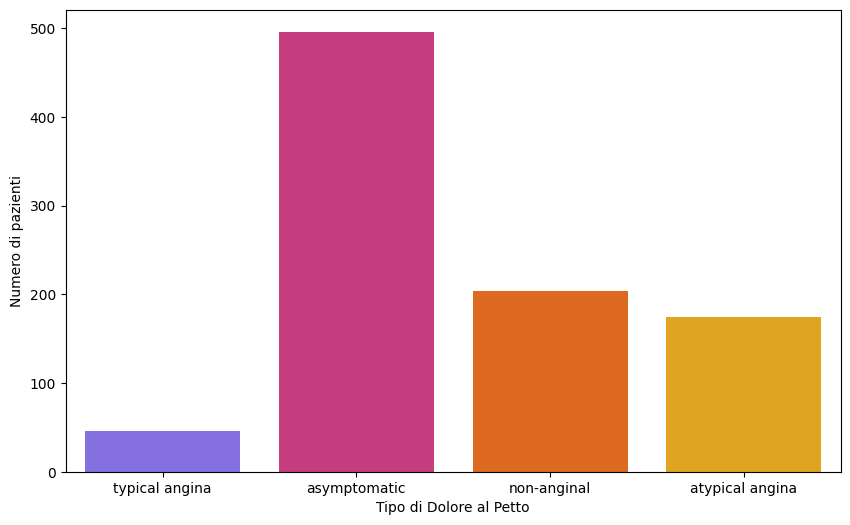

In [290]:
# Grafico a barre per il tipo di dolore al petto
sns.countplot(x='cp', data=df, palette=f_cls)
#plt.title('Frequenza dei tipi di dolore al petto')
plt.xlabel('Tipo di Dolore al Petto')
plt.ylabel('Numero di pazienti')
plt.show()